In [190]:
# 한글폰트
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
!apt-get update -qq
!apt-get install fonte-nanum* -qq

import matplotlib.font_manager as fm
fm._rebuild()

# 한글 폰트 확인하기
for fontInfo in fm.fontManager.ttflist:
  if 'Nanum' in fontInfo.name:
    print(fontInfo.name + ' = '+fontInfo.fname)

plt.rc('font', family = 'NanumGothic')

# 패키지 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

E: Unable to locate package fonte-nanum*
E: Couldn't find any package by glob 'fonte-nanum*'
E: Couldn't find any package by regex 'fonte-nanum*'
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareR.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothic.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareB.ttf


In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [192]:
whole_data = pd.read_excel('/content/drive/MyDrive/빅콘테스트/2021 빅콘테스트_데이터분석분야_챔피언리그_수산Biz_문제데이터.xlsx')

In [193]:
whole_data.head()

,REG_DATE,P_TYPE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE
0,2015-12-28,수산물,아르헨티나,아르헨티나,판매용,갑각류,새우,아르헨티나붉은새우,냉동,7.480000
1,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,냉동,2.920000
2,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,"냉동,절단",3.356352
3,2015-12-28,수산물,칠레,칠레,판매용,패류 멍게류,해삼,해삼,"건조,자숙",18.260870
4,2015-12-28,수산물,중국,중국,판매용,어류,서대 박대 페루다,서대,냉동,4.791340


In [194]:
whole_data = whole_data.rename(columns = {'REG_DATE':'기준일', 'P_TYPE':'제품구분','CTRY_1':'제조국','CTRY_2':'수출국',
                        'P_PURPOSE':'수입용도','CATEGORY_1':'중분류명 카테고리',
                        'CATEGORY_2':'어종','P_NAME':'상세어종','P_IMPORT_TYPE':'수입형태',
                        'P_PRICE':'target'})

In [195]:
# 상세어종에서 연어인 데이터만 빼준다.
df = whole_data[whole_data['상세어종'] == '연어']

# 데이터의 index를 다시 설정해준다.
df = df.reset_index(drop = True)

In [196]:
df.head()

,기준일,제품구분,제조국,수출국,수입용도,중분류명 카테고리,어종,상세어종,수입형태,target
0,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,필렛(F)",12.936815
1,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,포장횟감,필렛(F)",19.146755
2,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,필렛(F),횟감",12.082384
3,2015-12-28,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",13.425826
4,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,냉장,8.844281


In [197]:
# 필요가 없는 데이터는 제거한다.
df = df.drop(['제품구분','중분류명 카테고리','어종','상세어종'], axis = 1)

In [198]:
df.head()

,기준일,제조국,수출국,수입용도,수입형태,target
0,2015-12-28,노르웨이,노르웨이,판매용,"냉장,필렛(F)",12.936815
1,2015-12-28,노르웨이,노르웨이,판매용,"냉장,포장횟감,필렛(F)",19.146755
2,2015-12-28,노르웨이,노르웨이,판매용,"냉장,필렛(F),횟감",12.082384
3,2015-12-28,노르웨이,노르웨이,자사제품제조용,"냉장,필렛(F)",13.425826
4,2015-12-28,노르웨이,노르웨이,판매용,냉장,8.844281


In [199]:
연어_수입형태 = set()

for index in df.index:
    value_list = df.loc[index, '수입형태'].split(',')

    연어_수입형태.update(value_list)

# 고유한 수입형태에 모두 0 넣어주기
df[list(연어_수입형태)] = 0

for index in df.index:

    value_list = df.loc[index, '수입형태'].split(',')

    for value in value_list:
        df.loc[index, value] = 1

In [200]:
df = df.reset_index(drop = True)

In [201]:
df

,기준일,제조국,수출국,수입용도,수입형태,target,슬라이스(S),냉장,필렛(F),곤이,냉동,포장횟감,횟감
0,2015-12-28,노르웨이,노르웨이,판매용,"냉장,필렛(F)",12.936815,0,1,1,0,0,0,0
1,2015-12-28,노르웨이,노르웨이,판매용,"냉장,포장횟감,필렛(F)",19.146755,0,1,1,0,0,1,0
2,2015-12-28,노르웨이,노르웨이,판매용,"냉장,필렛(F),횟감",12.082384,0,1,1,0,0,0,1
3,2015-12-28,노르웨이,노르웨이,자사제품제조용,"냉장,필렛(F)",13.425826,0,1,1,0,0,0,0
4,2015-12-28,노르웨이,노르웨이,판매용,냉장,8.844281,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,2019-12-30,노르웨이,노르웨이,판매용,"냉장,필렛(F)",16.495971,0,1,1,0,0,0,0
1485,2019-12-30,노르웨이,노르웨이,판매용,"냉장,필렛(F),횟감",18.350634,0,1,1,0,0,0,1
1486,2019-12-30,노르웨이,노르웨이,자사제품제조용,냉장,11.128269,0,1,0,0,0,0,0
1487,2019-12-30,노르웨이,노르웨이,자사제품제조용,"냉장,필렛(F)",15.631531,0,1,1,0,0,0,0


# EDA

In [202]:
df['수입형태'].unique()

array(['냉장,필렛(F)', '냉장,포장횟감,필렛(F)', '냉장,필렛(F),횟감', '냉장', '냉동', '냉동,곤이',
       '냉동,슬라이스(S),포장횟감', '냉동,필렛(F)'], dtype=object)

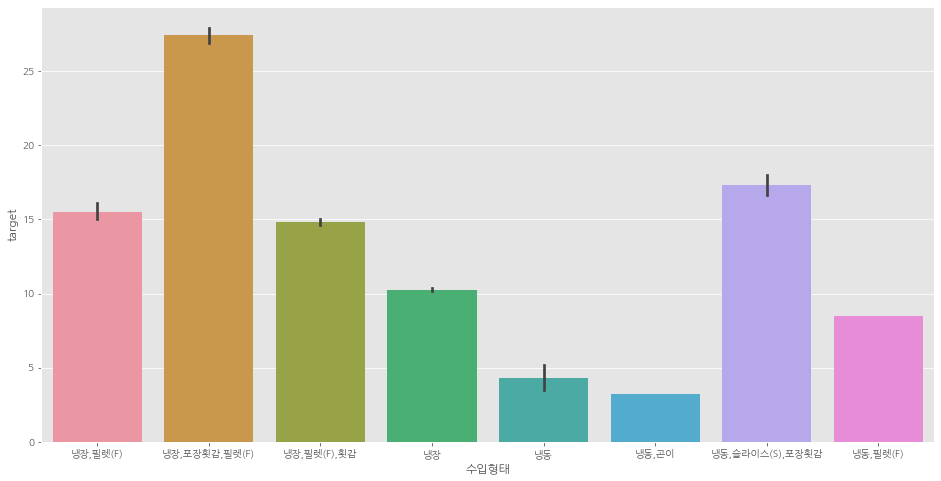

In [203]:
# 수입형태별로 살펴보자.
plt.figure(figsize = (16,8))
sns.barplot(data = df, x = '수입형태', y = 'target')

In [204]:
# 냉장인 데이터와 냉동인 데이터를 나눠주면 더 좋은 성과를 낼 것 같다.
# 베트남의 데이터만 있는 것으로 확인다.
df[df['수입형태'] == '냉동,슬라이스(S),포장횟감']

,기준일,제조국,수출국,수입용도,수입형태,target,슬라이스(S),냉장,필렛(F),곤이,냉동,포장횟감,횟감
871,2018-05-14,베트남,베트남,판매용,"냉동,슬라이스(S),포장횟감",18.00000,1,0,0,0,1,1,0
1048,2018-11-05,노르웨이,베트남,판매용,"냉동,슬라이스(S),포장횟감",16.63513,1,0,0,0,1,1,0


In [205]:
# 다른 데이터의 수입형태별로 데이터가 얼마나 있는지 확인해 보자.
for i in df['수입형태'].unique():
  print(f'{i}의 개수 :',len(df[df['수입형태'] == i]))

냉장,필렛(F)의 개수 : 420
냉장,포장횟감,필렛(F)의 개수 : 211
냉장,필렛(F),횟감의 개수 : 236
냉장의 개수 : 602
냉동의 개수 : 16
냉동,곤이의 개수 : 1
냉동,슬라이스(S),포장횟감의 개수 : 2
냉동,필렛(F)의 개수 : 1


In [206]:
# 냉동데이터와 냉장 4개로 변수 5개로 만들어서 진행해 준다면 어떨까?
df['수입형태변형'] = df['수입형태'].apply(lambda x:x[:2] if x[:2] == '냉동' else x)

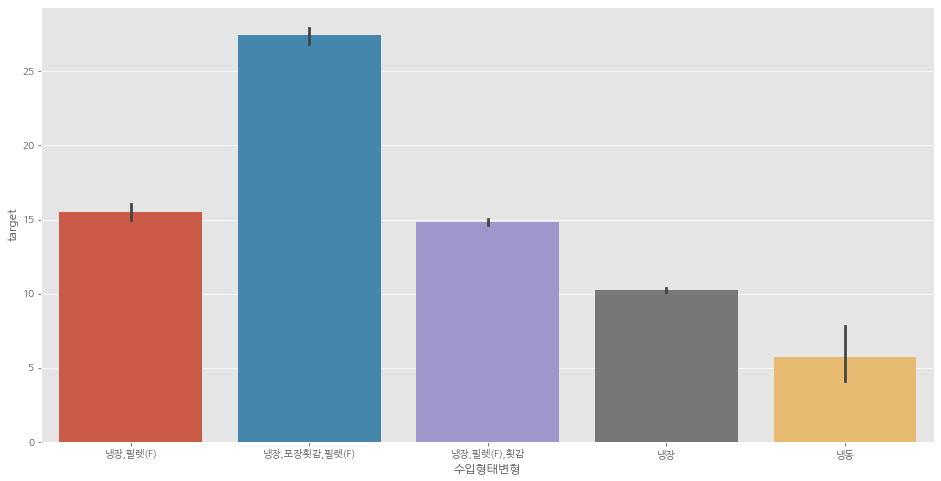

In [207]:
# barplot으로 살펴보도록 하자.
plt.figure(figsize =(16,8))
sns.barplot(data = df, x = '수입형태변형', y = 'target')

## 수입용도

In [208]:
df['수입용도'].unique()

array(['판매용', '자사제품제조용', '외화획득용 원료'], dtype=object)

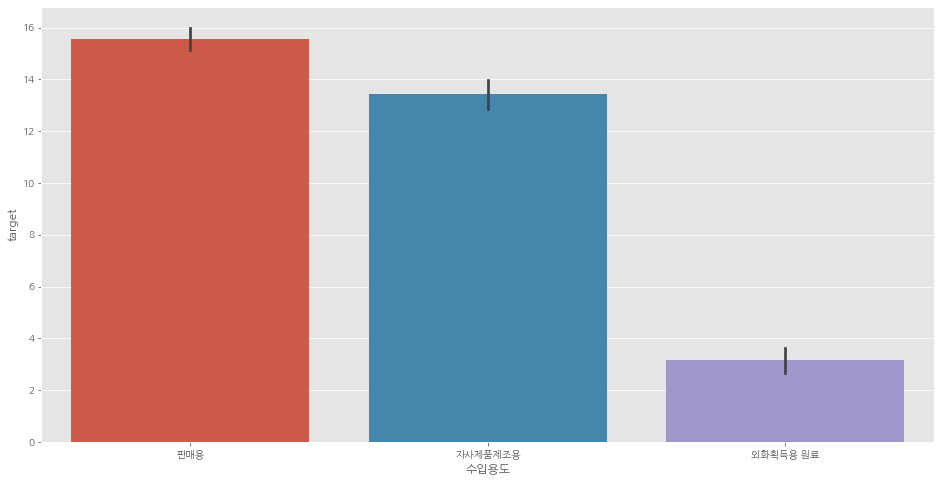

In [209]:
plt.figure(figsize = (16,8))
sns.barplot(data = df, x = '수입용도', y = 'target')

In [210]:
# 수입용도별 수입형태의 차이점이 있는지 확인해 보자.
for i in df['수입용도'].unique():
  print(f'{i}의 수입형태 :',df[df['수입용도'] == i]['수입형태변형'].unique())
  print()

판매용의 수입형태 : ['냉장,필렛(F)' '냉장,포장횟감,필렛(F)' '냉장,필렛(F),횟감' '냉장' '냉동']

자사제품제조용의 수입형태 : ['냉장,필렛(F)' '냉장' '냉장,필렛(F),횟감']

외화획득용 원료의 수입형태 : ['냉동']



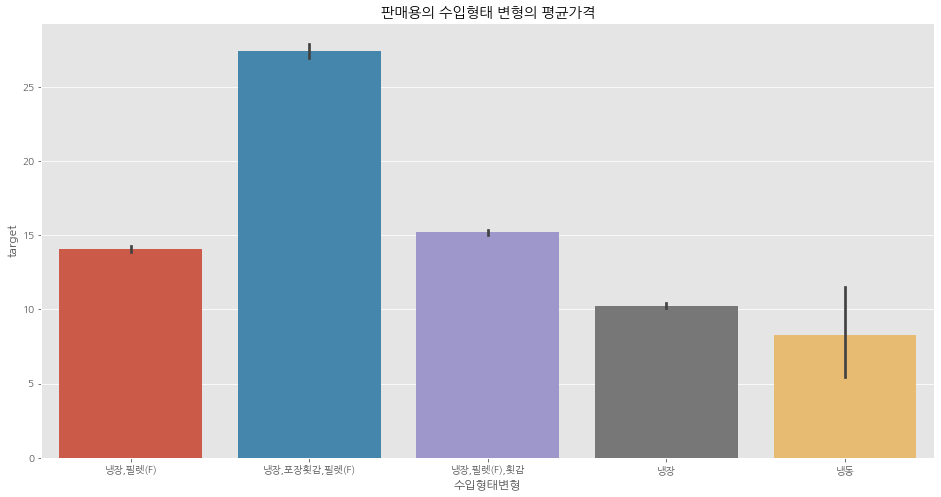

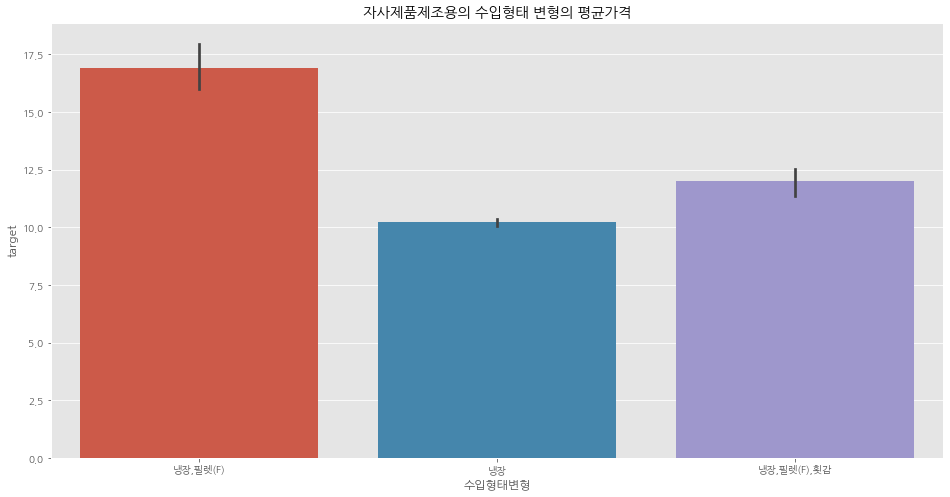

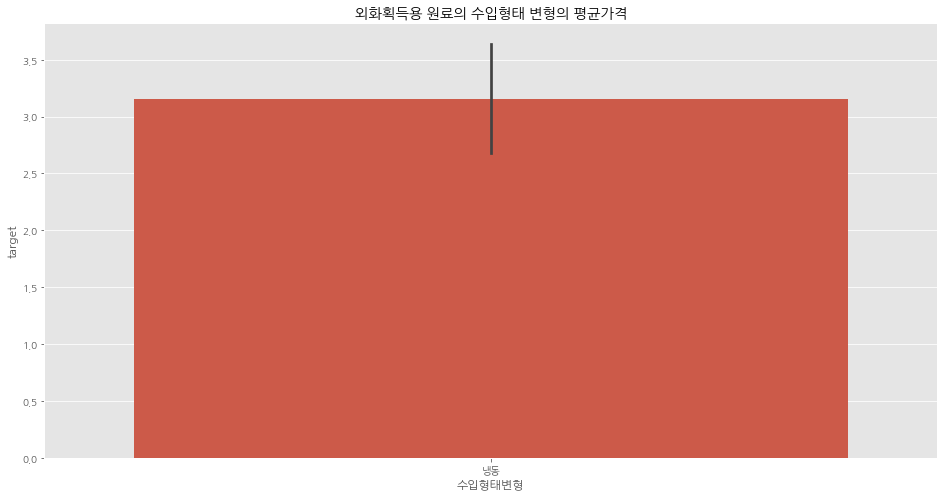

In [211]:
# 판매용은 (냉장,필렛,횟감)이 (냉장,필렛)보다 더 높은 가격이지만 자사제품제조용에서는 (냉장,필렛)이 더 높은 가격대가 형성되어 있다.
for i in df['수입용도'].unique():
  plt.figure(figsize = (16,8))
  sns.barplot(data = df[df['수입용도'] == i], x = '수입형태변형', y = 'target')
  plt.title(f'{i}의 수입형태 변형의 평균가격')
  plt.show()

In [212]:
# 각 수입용도별로 몇개씩 있는지 확인해 보자.
for i in df['수입용도'].unique():
  print(f'{i} 수입용도')
  for j in df[df['수입용도'] == i]['수입형태'].unique():
    print(f'{j}의 개수 :',len(df[(df['수입용도'] == i) & (df['수입형태'] == j)]))
  print()

판매용 수입용도
냉장,필렛(F)의 개수 : 210
냉장,포장횟감,필렛(F)의 개수 : 211
냉장,필렛(F),횟감의 개수 : 207
냉장의 개수 : 387
냉동의 개수 : 6
냉동,곤이의 개수 : 1
냉동,슬라이스(S),포장횟감의 개수 : 2
냉동,필렛(F)의 개수 : 1

자사제품제조용 수입용도
냉장,필렛(F)의 개수 : 210
냉장의 개수 : 215
냉장,필렛(F),횟감의 개수 : 29

외화획득용 원료 수입용도
냉동의 개수 : 10



# 대체품

In [213]:
# 예를 들어서 연어의 가격이 올라간다면? 다른 연어의 대체품이 생성되면서 다른 연어의 판매량이 늘어나면서 가격이 상승하지 않을까?
whole_data.head()

,기준일,제품구분,제조국,수출국,수입용도,중분류명 카테고리,어종,상세어종,수입형태,target
0,2015-12-28,수산물,아르헨티나,아르헨티나,판매용,갑각류,새우,아르헨티나붉은새우,냉동,7.480000
1,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,냉동,2.920000
2,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,"냉동,절단",3.356352
3,2015-12-28,수산물,칠레,칠레,판매용,패류 멍게류,해삼,해삼,"건조,자숙",18.260870
4,2015-12-28,수산물,중국,중국,판매용,어류,서대 박대 페루다,서대,냉동,4.791340


상세어종            곱사연어     대서양연어         연어       왕연어  은연어  홍연어,Red salmon
기준일                                                                     
2015-12-28       NaN  5.502307  13.287212       NaN  NaN             NaN
2016-01-04       NaN  5.532486  12.331994       NaN  9.4             NaN
2016-01-11  2.149987  5.353940  12.876513       NaN  NaN             NaN
2016-01-18       NaN  4.517907  13.387350       NaN  9.4             NaN
2016-01-25       NaN  4.732892  12.644323  9.722101  NaN             NaN


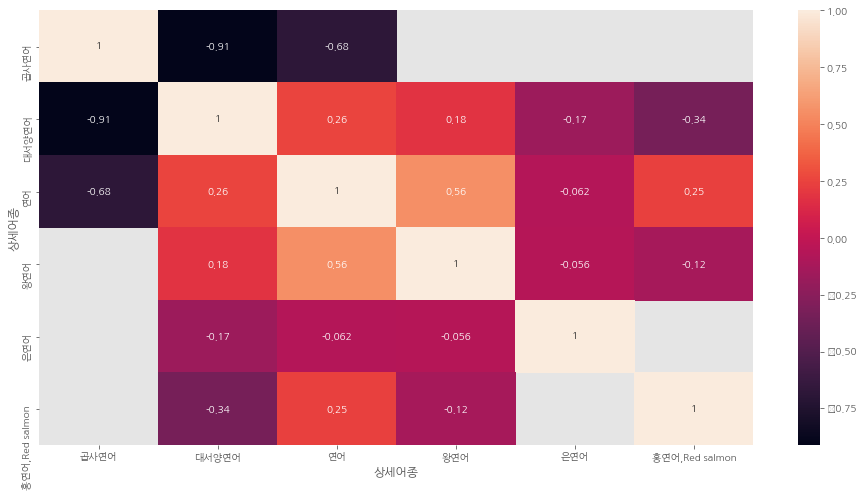

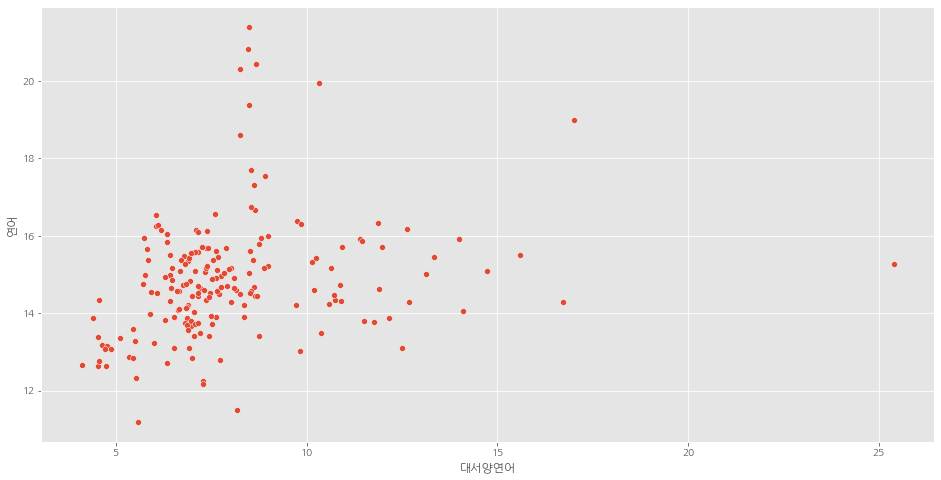

In [214]:
salmon_df = whole_data[whole_data['어종'] == '연어']

salmon_대체제 = pd.pivot_table(salmon_df, index = '기준일', columns = '상세어종', values = 'target', aggfunc = 'mean')
print(salmon_대체제.head())

plt.figure(figsize = (16,8))
sns.heatmap(salmon_대체제.corr(), annot = True)
plt.show()
# 연어와 대서양연어는 0.26의 연관성이 있다.
# 그러면 이번에는 lineplot으로 연관이 있는지 확인해 보자.
plt.figure(figsize = (16,8))
sns.scatterplot(data = salmon_대체제, x = '대서양연어', y = '연어')
plt.show()

## 나라별로 살펴보기

In [215]:
df.head()

,기준일,제조국,수출국,수입용도,수입형태,target,슬라이스(S),냉장,필렛(F),곤이,냉동,포장횟감,횟감,수입형태변형
0,2015-12-28,노르웨이,노르웨이,판매용,"냉장,필렛(F)",12.936815,0,1,1,0,0,0,0,"냉장,필렛(F)"
1,2015-12-28,노르웨이,노르웨이,판매용,"냉장,포장횟감,필렛(F)",19.146755,0,1,1,0,0,1,0,"냉장,포장횟감,필렛(F)"
2,2015-12-28,노르웨이,노르웨이,판매용,"냉장,필렛(F),횟감",12.082384,0,1,1,0,0,0,1,"냉장,필렛(F),횟감"
3,2015-12-28,노르웨이,노르웨이,자사제품제조용,"냉장,필렛(F)",13.425826,0,1,1,0,0,0,0,"냉장,필렛(F)"
4,2015-12-28,노르웨이,노르웨이,판매용,냉장,8.844281,0,1,0,0,0,0,0,냉장


Text(0.5, 1.0, '제조국 count')

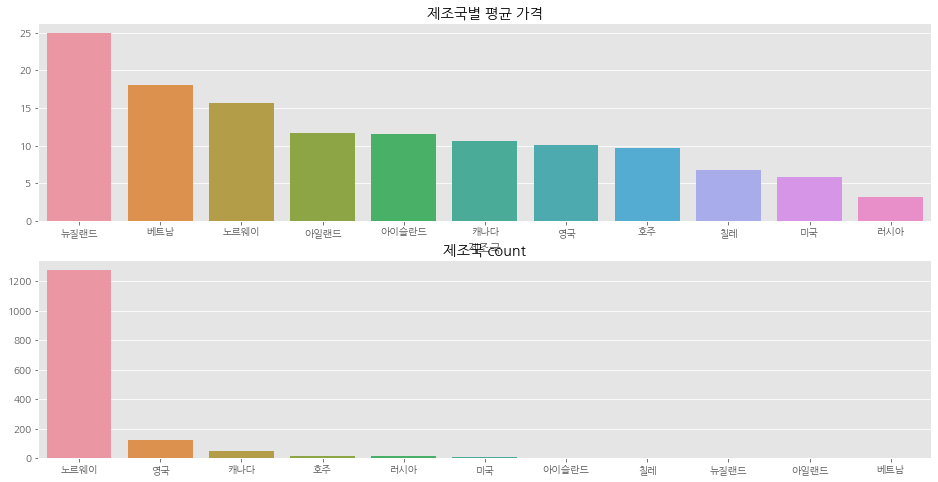

In [216]:
# 뉴질랜드와 베트남의 데이터가 연어 가격의 지표라는 노르웨이보다 높다.
# 노르웨이 이외에 데이터도 하나하나 살펴보도록 하자.
fig, ax = plt.subplots(ncols = 1,nrows = 2, figsize = (16,8))

plot_data = df.groupby('제조국')['target'].mean().sort_values(ascending = False)

sns.barplot(x = plot_data.index, y = plot_data.values, ax = ax[0])
sns.barplot(x = df['제조국'].value_counts().index, y = df['제조국'].value_counts().values)
ax[0].set_title('제조국별 평균 가격')
ax[1].set_title('제조국 count')

In [217]:
df.columns

Index(['기준일', '제조국', '수출국', '수입용도', '수입형태', 'target', '슬라이스(S)', '냉장', '필렛(F)',
       '곤이', '냉동', '포장횟감', '횟감', '수입형태변형'],
      dtype='object')

In [218]:
# 저번 EDA에서 뉴질랜드와 베트남은 합쳐서 3개의 데이터가 있다는 것을 확인했다.
# 그러면 이번에는 아일랜드, 아이슬란드, 호주, 칠레, 미국, 러시아가 몇개의 데이터가 있는지 확인해보자.
for i in ['아일랜드','아이슬란드','호주','칠레','미국','러시아']:
  print(f'************************************************************************{i}************************************************************************')
  print(df[df['제조국'] == i][['기준일', '제조국', '수출국', '수입용도', '수입형태', 'target']])
  print()

************************************************************************아일랜드************************************************************************
           기준일   제조국   수출국 수입용도 수입형태     target
239 2016-08-08  아일랜드  아일랜드  판매용   냉장  11.176759
308 2016-10-10  아일랜드  아일랜드  판매용   냉장  12.219814

************************************************************************아이슬란드************************************************************************
            기준일    제조국    수출국 수입용도 수입형태     target
796  2018-02-26  아이슬란드  아이슬란드  판매용   냉장  10.301168
1473 2019-12-23  아이슬란드  아이슬란드  판매용   냉장  12.156854
1481 2019-12-30  아이슬란드  아이슬란드  판매용   냉장  12.277997

************************************************************************호주************************************************************************
            기준일 제조국 수출국     수입용도 수입형태    target
1010 2018-10-01  호주  호주  자사제품제조용   냉장  9.730570
1027 2018-10-15  호주  호주  자사제품제조용   냉장  9.726441
1034 2018-10-22  호주  호주  자사제품제조용   냉장  9.729175
1041 2018-10

In [219]:
# 이번에는 몇개 없는 데이터 말고 많은 데이터를 보유하고 있는 데이터들을 살펴보자.
for i in ['영국','캐나다']:
  print(f'************************************************************************{i}************************************************************************')
  print(df[df['제조국'] == i][['기준일', '제조국', '수출국', '수입용도', '수입형태', 'target']])
  print()

************************************************************************영국************************************************************************
            기준일 제조국 수출국 수입용도 수입형태     target
140  2016-05-16  영국  영국  판매용   냉장   7.748498
163  2016-06-06  영국  영국  판매용   냉장   6.997001
194  2016-07-04  영국  영국  판매용   냉장   7.601770
203  2016-07-11  영국  영국  판매용   냉장  12.710946
213  2016-07-18  영국  영국  판매용   냉장   9.396112
...         ...  ..  ..  ...  ...        ...
1420 2019-11-04  영국  영국  판매용   냉장   8.933301
1428 2019-11-11  영국  영국  판매용   냉장   8.862892
1436 2019-11-18  영국  영국  판매용   냉장   9.579074
1444 2019-11-25  영국  영국  판매용   냉장  10.426586
1465 2019-12-16  영국  영국  판매용   냉장  13.034587

[120 rows x 6 columns]

************************************************************************캐나다************************************************************************
            기준일  제조국  수출국 수입용도 수입형태     target
5    2016-01-04  캐나다  캐나다  판매용   냉장   9.200743
30   2016-02-01  캐나다  캐나다  판매용   냉장   9.690027

In [220]:
# 캐나다에서는 판매용, 냉장만 판매를 진행한다.
# 그러면 이번에는 영국은 어떤 부분이 있는지 확인해보자.
for i in ['수입용도','수입형태']:
  print(f'영국의 {i} 종류 :',df[df['제조국'] == '영국'][f'{i}'].unique())
  print()

영국의 수입용도 종류 : ['판매용']

영국의 수입형태 종류 : ['냉장' '냉장,포장횟감,필렛(F)']



In [221]:
# 수입용도는 판매용 밖에 없지만 냉장, (냉장,포장횟감,필렛(F))에 대한 데이터를 다시 살펴봐야 겠다.
for i in df[df['제조국'] == '영국']['수입형태'].unique():
  print(f'************************************************************************{i}************************************************************************')
  print(df[(df['제조국'] == '영국') & (df['수입형태'] == i)][['기준일', '제조국', '수출국', '수입용도', '수입형태', 'target']])
  print()

# 영국의 경우 수입용도가 하나를 제외한 모든 데이터가 냉장의 데이터라는 것을 알아냈다.

************************************************************************냉장************************************************************************
            기준일 제조국 수출국 수입용도 수입형태     target
140  2016-05-16  영국  영국  판매용   냉장   7.748498
163  2016-06-06  영국  영국  판매용   냉장   6.997001
194  2016-07-04  영국  영국  판매용   냉장   7.601770
203  2016-07-11  영국  영국  판매용   냉장  12.710946
213  2016-07-18  영국  영국  판매용   냉장   9.396112
...         ...  ..  ..  ...  ...        ...
1420 2019-11-04  영국  영국  판매용   냉장   8.933301
1428 2019-11-11  영국  영국  판매용   냉장   8.862892
1436 2019-11-18  영국  영국  판매용   냉장   9.579074
1444 2019-11-25  영국  영국  판매용   냉장  10.426586
1465 2019-12-16  영국  영국  판매용   냉장  13.034587

[119 rows x 6 columns]

************************************************************************냉장,포장횟감,필렛(F)************************************************************************
           기준일 제조국 수출국 수입용도           수입형태     target
488 2017-04-03  영국  영국  판매용  냉장,포장횟감,필렛(F)  15.016575



- 자사제품제조용으로 수입하는 곳 : 노르웨이, 호주
- 판매용 : (러시아에서 하나의 데이터)와 호주를 제외한 모든 나라
- 외화 획득용 원료 : 러시아

- 냉동 : 칠레(데이터 1개), 러시아, 미국, 노르웨이
- 냉장 : 나머지 전부(노르웨이 포함)

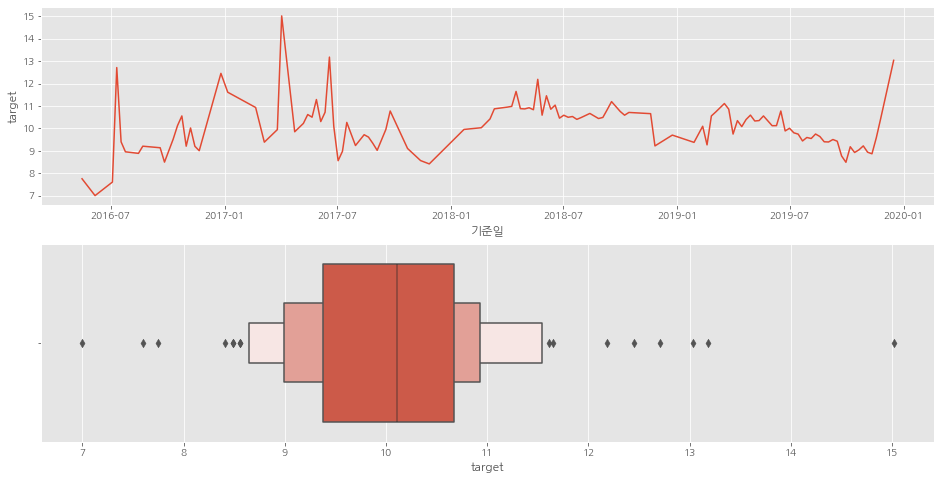

In [222]:
# 데이터를 살펴보자.
# 캐나다 22가 넘는 데이터가 존재.
# 데이터를 확인해 보니 노르웨이와 노르웨이가 아닌 데이터를 나누는 방법도 좋은 방법이 될 것 같다.
# 그러나 120개의 데이터가 있는 영국은 다시 한번 샇펴볼 필요가 있다.

fig, ax = plt.subplots(nrows = 2, figsize = (16,8))
sns.lineplot(data =df[df['제조국'] == '영국'], x = '기준일', y = 'target', ax = ax[0])
sns.boxenplot(df[df['제조국'] == '영국']['target'], ax = ax[1])

# 15이상의 데이터는 수입 형태가 다르기 때문에
# 나머지는 데이터가 많은 차이를 보이는 경우도 많다.
# 이 부분은 이상치로 제거하는게 맞지 않을까?

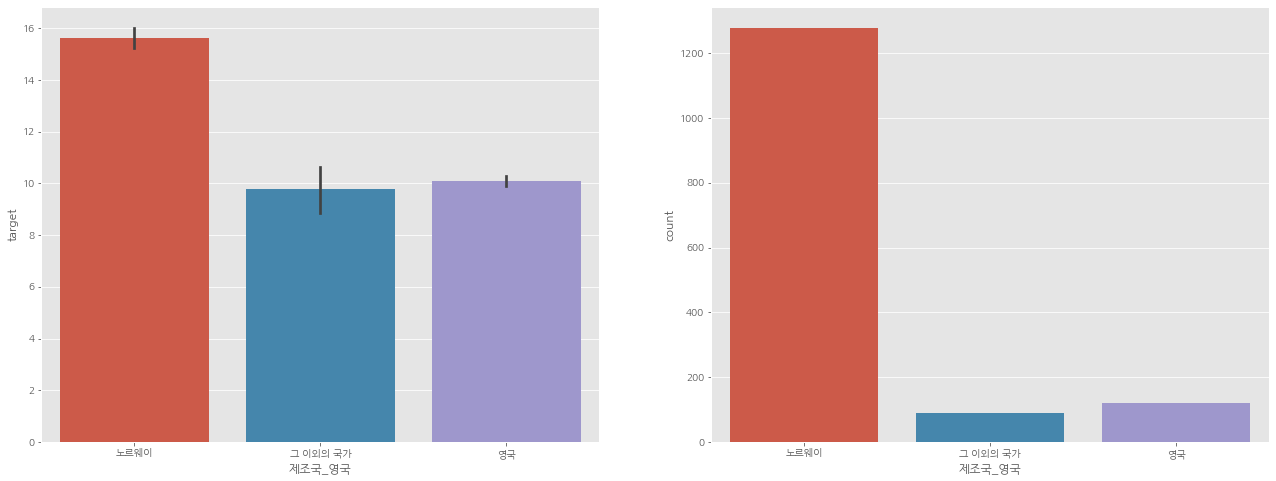

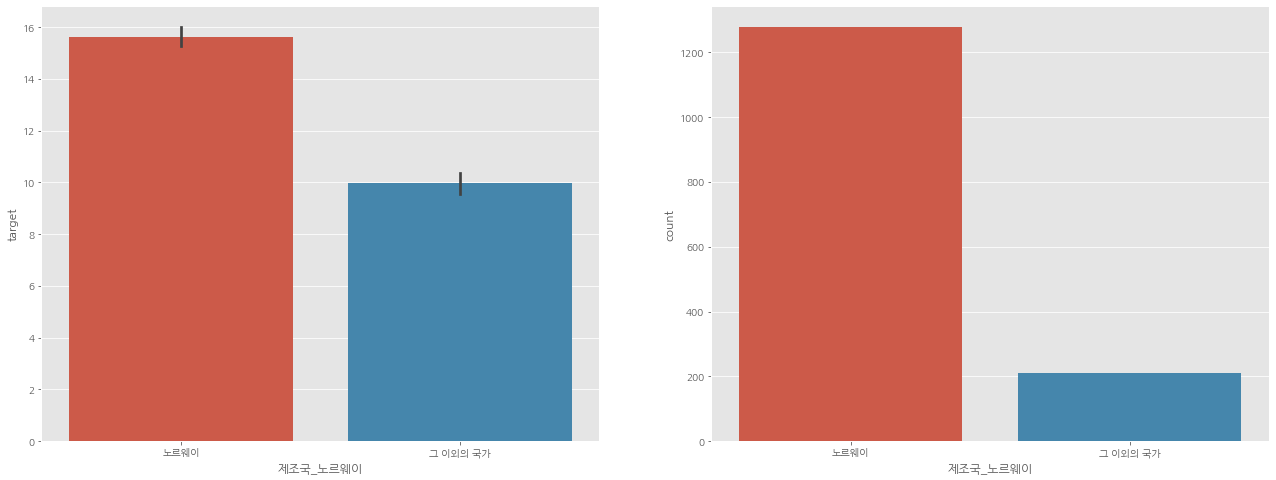

In [223]:
# 나라의 분석을 위해서 copy를 사용한다.
plot_data = df.copy()

# 노르웨이, 영국, 그 이외의 국가로 전처리를 하고 그래프를 그려본다.
plot_data['제조국_영국'] = plot_data['제조국'].apply(lambda x:x if (x == '노르웨이') | (x == '영국') else '그 이외의 국가' )

fig, ax = plt.subplots(ncols = 2 , figsize = (22,8))
sns.barplot(data = plot_data, x = '제조국_영국', y = 'target', ax = ax[0])
sns.countplot(plot_data['제조국_영국'], ax = ax[1])
plt.show()

# 노르웨이, 그 이외의 국가로 전처리르 하고 그래프를 그려본다.
plot_data['제조국_노르웨이'] = plot_data['제조국'].apply(lambda x:x if x == '노르웨이' else '그 이외의 국가')

fig, ax = plt.subplots(ncols = 2, figsize = (22,8))
sns.barplot(data = plot_data, x = '제조국_노르웨이', y = 'target', ax = ax[0])
sns.countplot(plot_data['제조국_노르웨이'], ax = ax[1])
plt.show()

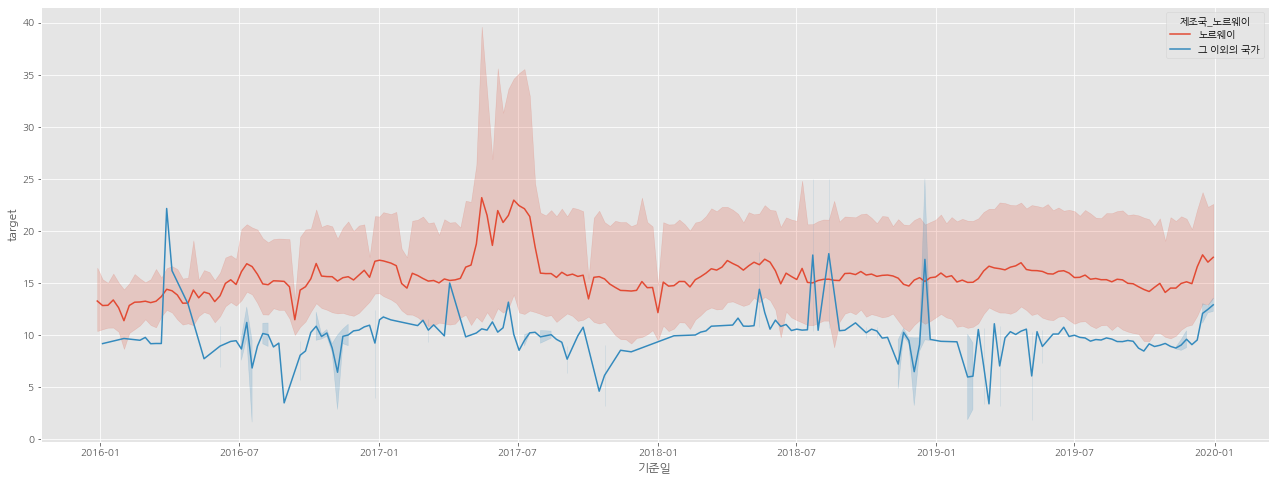

In [224]:
# lineplot으로 차이가 있는지 확인해 보자.
plt.figure(figsize = (22,8))
sns.lineplot(data = plot_data, x = '기준일', y = 'target', hue = '제조국_노르웨이')

# 환율

In [225]:
exrate = pd.read_csv('/content/drive/MyDrive/빅콘테스트/AquaticAnimalsPrice/DataSets/환율데이터.csv')
exrate.head()

,적용개시일자,국가부호,통화부호,환율,수출입구분,화폐단위명
0,20150111,AE,AED,303.21,2,UAE Dirham
1,20150111,AT,ATS,96.11,2,Schilling
2,20150111,AU,AUD,900.64,2,Australian Dollar
3,20150111,BD,BDT,14.32,2,Taka
4,20150111,BE,BEF,32.78,2,Belgian Franc


In [226]:
노르웨이_환율 = exrate[exrate['국가부호'] == 'NO']
노르웨이_환율.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347 entries, 40 to 20454
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   적용개시일자  347 non-null    int64  
 1   국가부호    347 non-null    object 
 2   통화부호    347 non-null    object 
 3   환율      347 non-null    float64
 4   수출입구분   347 non-null    int64  
 5   화폐단위명   347 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 19.0+ KB


In [227]:
def change_datetime(x):
  x = str(x)
  year = x[:4]
  month = x[4:6]
  day = x[6:8]

  return year + '-' + month + '-' + day

노르웨이_환율['적용개시일자'] = 노르웨이_환율['적용개시일자'].apply(change_datetime)

In [228]:
노르웨이_환율 = 노르웨이_환율[(노르웨이_환율['적용개시일자'] > '2015-12-21') & (노르웨이_환율['적용개시일자'] < '2020')]

In [229]:
new_df = 노르웨이_환율['환율'].reset_index(drop = True)
new_df = pd.concat([pd.Series(df['기준일'].unique()), new_df],axis = 1)

new_df = new_df.rename(columns = {0 :'기준일', '환율':'Exchange rate'})
new_df

,기준일,Exchange rate
0,2015-12-28,136.03
1,2016-01-04,135.35
2,2016-01-11,134.86
3,2016-01-18,137.74
4,2016-01-25,138.22
...,...,...
205,2019-12-02,129.61
206,2019-12-09,130.55
207,2019-12-16,131.84
208,2019-12-23,131.00


In [230]:
df = pd.merge(df, new_df, how = 'outer', on = '기준일')

Text(0.5, 1.0, 'Exchange rate의 box plot 확인하기')

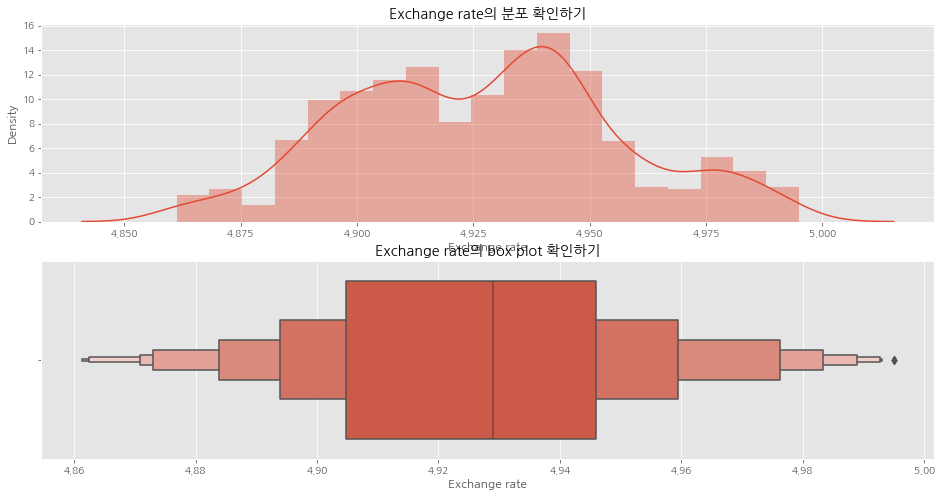

In [231]:
fig, ax = plt.subplots(nrows = 2, figsize = (16,8))
sns.distplot(df['Exchange rate'].apply(lambda x: np.log1p(x)), ax = ax[0])
sns.boxenplot(df['Exchange rate'].apply(lambda x: np.log1p(x)), ax = ax[1])
ax[0].set_title('Exchange rate의 분포 확인하기')
ax[1].set_title('Exchange rate의 box plot 확인하기')

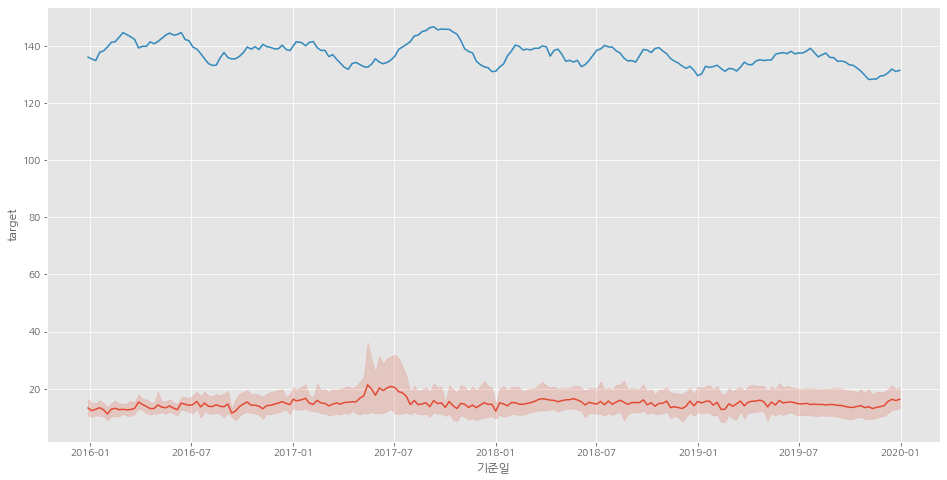

In [232]:
# 환율 데이터의 lineplot과 연어의 평균 가격의 lineplot을 그려보자.
plt.figure(figsize = (16,8))
sns.lineplot(data = df, x = '기준일', y = 'target')
sns.lineplot(data = df, x = '기준일', y = 'Exchange rate')
plt.show()

# 모델링

In [233]:
df['제조국'].unique()

array(['노르웨이', '캐나다', '영국', '칠레', '아일랜드', '미국', '러시아', '아이슬란드', '베트남',
       '뉴질랜드', '호주'], dtype=object)

In [234]:
df

,기준일,제조국,수출국,수입용도,수입형태,target,슬라이스(S),냉장,필렛(F),곤이,냉동,포장횟감,횟감,수입형태변형,Exchange rate
0,2015-12-28,노르웨이,노르웨이,판매용,"냉장,필렛(F)",12.936815,0,1,1,0,0,0,0,"냉장,필렛(F)",136.03
1,2015-12-28,노르웨이,노르웨이,판매용,"냉장,포장횟감,필렛(F)",19.146755,0,1,1,0,0,1,0,"냉장,포장횟감,필렛(F)",136.03
2,2015-12-28,노르웨이,노르웨이,판매용,"냉장,필렛(F),횟감",12.082384,0,1,1,0,0,0,1,"냉장,필렛(F),횟감",136.03
3,2015-12-28,노르웨이,노르웨이,자사제품제조용,"냉장,필렛(F)",13.425826,0,1,1,0,0,0,0,"냉장,필렛(F)",136.03
4,2015-12-28,노르웨이,노르웨이,판매용,냉장,8.844281,0,1,0,0,0,0,0,냉장,136.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,2019-12-30,노르웨이,노르웨이,판매용,"냉장,필렛(F)",16.495971,0,1,1,0,0,0,0,"냉장,필렛(F)",131.41
1485,2019-12-30,노르웨이,노르웨이,판매용,"냉장,필렛(F),횟감",18.350634,0,1,1,0,0,0,1,"냉장,필렛(F),횟감",131.41
1486,2019-12-30,노르웨이,노르웨이,자사제품제조용,냉장,11.128269,0,1,0,0,0,0,0,냉장,131.41
1487,2019-12-30,노르웨이,노르웨이,자사제품제조용,"냉장,필렛(F)",15.631531,0,1,1,0,0,0,0,"냉장,필렛(F)",131.41


In [235]:
# 제조국을 노르웨이, 그 이외 국가로 변형시킨다.
df['제조국'] = df['제조국'].apply(lambda x:x if x == '노르웨이' else '그 이외의 국가')

In [249]:
df['수입용도'].unique()

array(['판매용', '자사제품제조용', '외화획득용 원료'], dtype=object)

In [253]:
# 나중에 데이터를 사용하기 위해서 남겨놓는다.
df_기준일 = df['기준일']
mapping = {'판매용': 2, '자사제품제조용':1, '외화획득용 원료':0} 
df['수입용도변형'] = df['수입용도'].map(mapping)

# cross validation을 사용해야 한다.
data = pd.get_dummies(df, columns = ['제조국','수입형태변형'], drop_first= True).drop(['수출국','수입형태','슬라이스(S)',	'냉장',	'필렛(F)',	'곤이',	'냉동',	'포장횟감',	'횟감','수입용도'], axis  = 1)

In [254]:
data

,기준일,target,Exchange rate,수입용도변형,제조국_노르웨이,수입형태변형_냉장,"수입형태변형_냉장,포장횟감,필렛(F)","수입형태변형_냉장,필렛(F)","수입형태변형_냉장,필렛(F),횟감"
0,2015-12-28,12.936815,136.03,2,1,0,0,1,0
1,2015-12-28,19.146755,136.03,2,1,0,1,0,0
2,2015-12-28,12.082384,136.03,2,1,0,0,0,1
3,2015-12-28,13.425826,136.03,1,1,0,0,1,0
4,2015-12-28,8.844281,136.03,2,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
1484,2019-12-30,16.495971,131.41,2,1,0,0,1,0
1485,2019-12-30,18.350634,131.41,2,1,0,0,0,1
1486,2019-12-30,11.128269,131.41,1,1,1,0,0,0
1487,2019-12-30,15.631531,131.41,1,1,0,0,1,0


In [265]:
# 모듈 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict, KFold
from xgboost import XGBRegressor

kf = KFold(n_splits = 3, shuffle= True)
model = XGBRegressor()
y_pred = cross_val_predict(model, data.drop(['기준일','target'], axis = 1), data['target'], cv = kf)

[16:13:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:13:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:13:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [266]:
len(y_pred)

1489

In [267]:
len(data)

1489

In [268]:
y_pred

array([14.442702, 27.896862, 14.750822, ..., 10.182221, 16.725426,
       10.548429], dtype=float32)

In [269]:
final_df = pd.concat([data[['기준일','target']], pd.Series(y_pred)], axis = 1).rename(columns = {0 : 'y_pred'}).groupby('기준일').mean()

mean_squared_error(final_df['target'], final_df['y_pred']) ** 0.5

1.2364600409178375

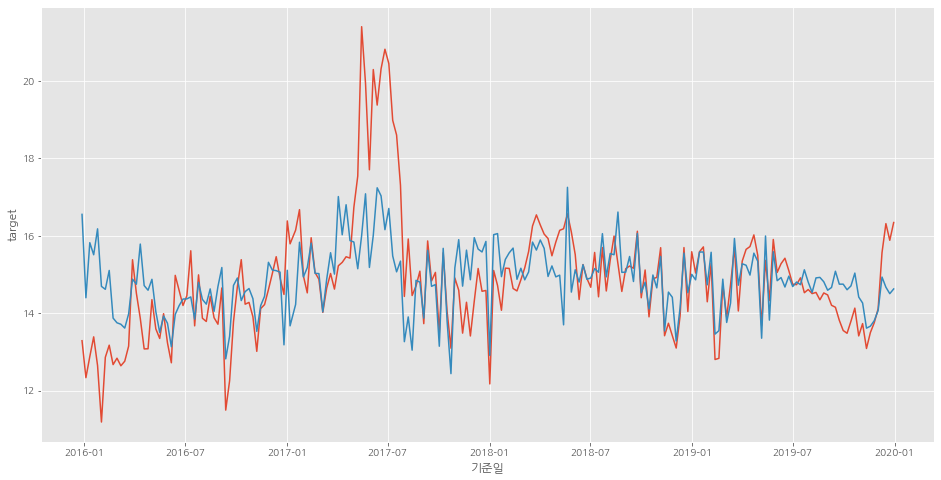

In [271]:
plt.figure(figsize = (16,8))
sns.lineplot(data = final_df, x = '기준일', y = 'target')
sns.lineplot(data = final_df, x = '기준일', y = 'y_pred')
plt.show()

In [261]:
final_y_test = data[data['기준일'] >= '2019'].groupby('기준일')['target'].mean()

In [262]:
mean_squared_error(final_y_test.values, final_y_pred.values) ** 0.5

0.7927473985195751

In [263]:
# 이건 뭐지?
import statsmodels.api as sm

X = sm.add_constant(data.drop(['기준일','target'], axis = 1))
y = data['target']

model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     558.1
Date:                Mon, 30 Aug 2021   Prob (F-statistic):               0.00
Time:                        16:10:22   Log-Likelihood:                -3978.8
No. Observations:                1489   AIC:                             7974.
Df Residuals:                    1481   BIC:                             8016.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   14.1092 

In [264]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(data.drop(['target','기준일'], axis = 1).values, i) for i in range(data.drop(['target','기준일'],axis = 1).shape[1])]
vif['features'] = data.drop(['기준일','target'],axis =1).columns
vif

,VIF Factor,features
0,75.960536,Exchange rate
1,16.912303,수입용도변형
2,10.188835,제조국_노르웨이
3,32.964176,수입형태변형_냉장
4,13.755538,"수입형태변형_냉장,포장횟감,필렛(F)"
5,24.700639,"수입형태변형_냉장,필렛(F)"
6,15.107879,"수입형태변형_냉장,필렛(F),횟감"
